In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
train=pd.read_csv(r'C:\Users\shashank\Desktop\Loan Prediction\train.csv')
test=pd.read_csv(r'C:\Users\shashank\Desktop\Loan Prediction\test.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


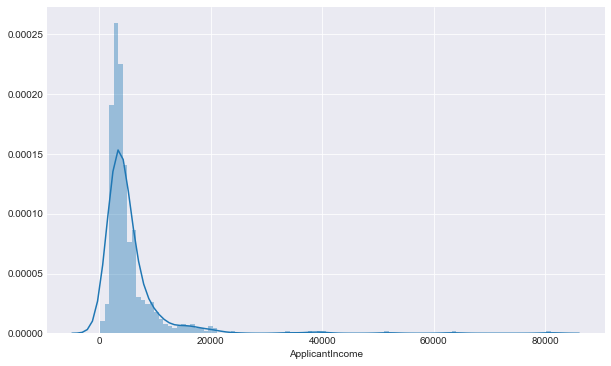

In [8]:
#histogram of income of applicant
sns.set_style('darkgrid')
plt.figure(figsize=(10,6))
sns.distplot(train['ApplicantIncome'],bins=100)

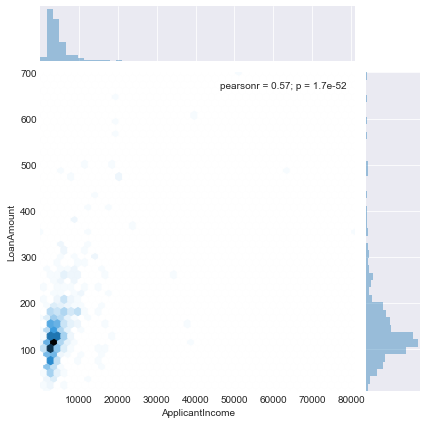

In [9]:
#We observe loan amount increases as income increases
sns.jointplot(x='ApplicantIncome',y='LoanAmount',data=train,kind='hex')

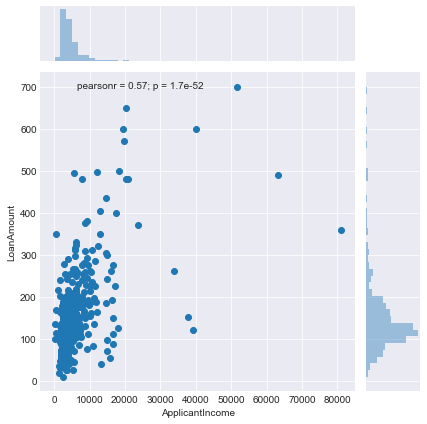

In [10]:
#We observe loan amount increases as income increases
sns.jointplot(x='ApplicantIncome',y='LoanAmount',data=train)

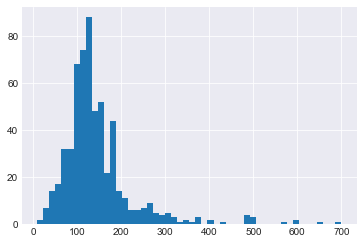

In [11]:
#histogram of loan amount of applicant
train['LoanAmount'].hist(bins=50)

In [12]:
dict={'Y':1,'N':0}
#map data to 0 and 1
train['Loan_Status']=train['Loan_Status'].apply(lambda x:dict[x])
train['Loan_Status']

0      1
1      0
2      1
3      1
4      1
5      1
6      1
7      0
8      1
9      0
10     1
11     1
12     1
13     0
14     1
15     1
16     1
17     0
18     0
19     1
20     0
21     1
22     0
23     0
24     0
25     1
26     1
27     1
28     0
29     1
      ..
584    0
585    0
586    1
587    1
588    1
589    0
590    1
591    0
592    1
593    1
594    1
595    1
596    0
597    0
598    1
599    1
600    0
601    1
602    1
603    1
604    1
605    0
606    1
607    1
608    1
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [13]:
#two ways to convert data to get required plot
#train[['Loan_Status','Credit_History']].groupby('Credit_History').mean()
table=train.pivot_table(values='Loan_Status',index=['Credit_History'])


In [14]:
table

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


Text(0.5,1,'Probability of getting loan by Credit History')

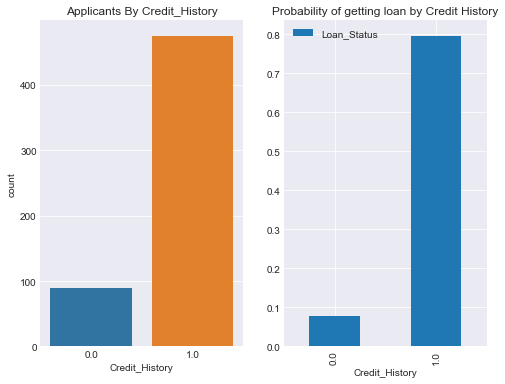

In [15]:
fig,axes=plt.subplots(ncols=2,nrows=1,figsize=(8,6))
sns.countplot(train['Credit_History'],ax=axes[0])
#plotting frequency 
axes[0].set_title('Applicants By Credit_History')
#plotting pivot table
table.plot(ax=axes[1],kind='bar')
axes[1].set_title('Probability of getting loan by Credit History')

In [16]:
crosstab=pd.crosstab(train['Credit_History'],train['Loan_Status'])

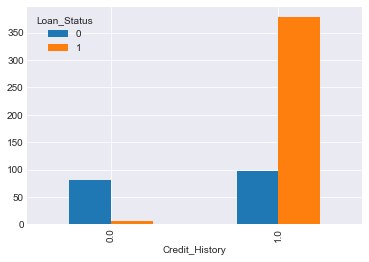

In [17]:
crosstab.plot(kind='bar')

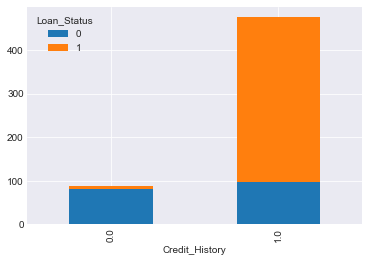

In [18]:
crosstab.plot(kind='bar',stacked=True)

In [19]:
#total non null values in our train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [20]:
#total null values in our train dataset
train.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [21]:
#time has come to fill na values in dataset
#Loan amount can be filled by mean 
train['LoanAmount'].fillna(train['LoanAmount'].mean(),inplace=True)

In [22]:
#let us look at trend in self employes
train['Self_Employed'].value_counts()
#most of them are not self employed
#so let us make fill na by no for higher probability of success

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [23]:
train['Self_Employed'].fillna('No',inplace=True)

In [24]:
train.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [25]:
'''Since our loanamount and income are right skewed we need
to take log transformation to make them less skewed.'''

'Since our loanamount and income are right skewed we need\nto take log transformation to make them less skewed.'

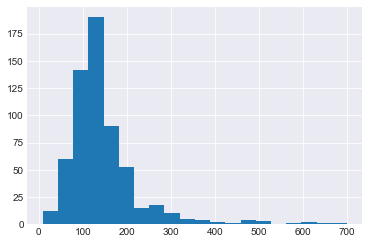

In [26]:
train['LoanAmount'].hist(bins=20)

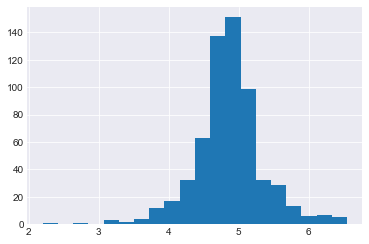

In [27]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

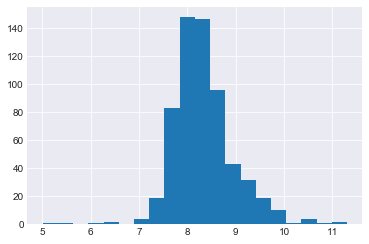

In [28]:
train['ApplicantIncome_log']=np.log(train['ApplicantIncome'])
train['ApplicantIncome_log'].hist(bins=20)

In [29]:
train.apply(lambda x:sum(x.isnull()),axis=0)

Loan_ID                 0
Gender                 13
Married                 3
Dependents             15
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term       14
Credit_History         50
Property_Area           0
Loan_Status             0
LoanAmount_log          0
ApplicantIncome_log     0
dtype: int64

In [30]:
'''we will fill na's of all other columns with most frequent
value'''
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)

In [31]:
train.apply(lambda x:x.isnull().sum())

Loan_ID                 0
Gender                  0
Married                 0
Dependents              0
Education               0
Self_Employed           0
ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Amount_Term       14
Credit_History          0
Property_Area           0
Loan_Status             0
LoanAmount_log          0
ApplicantIncome_log     0
dtype: int64

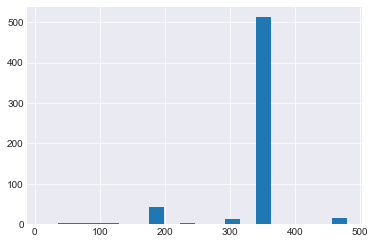

In [32]:
train['Loan_Amount_Term'].hist(bins=20)

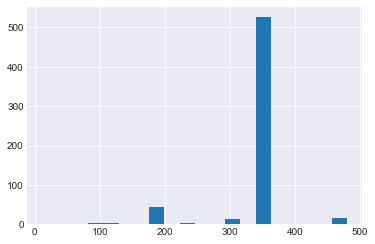

In [33]:
#let us fill na's with median value since left skewed
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)
train['Loan_Amount_Term'].hist(bins=20)

In [34]:
train.apply(lambda x:x.isnull().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_log         0
ApplicantIncome_log    0
dtype: int64

In [35]:
#mapping data from categorial to numerical

dict={'Male':1,'Female':0}
train['Gender']=train['Gender'].apply(lambda x:dict[x])
dict={'Yes':1,'No':0}
train['Married']=train['Married'].apply(lambda x:dict[x])
dict={'Graduate':1,'Not Graduate':0}
train['Education']=train['Education'].apply(lambda x:dict[x])
dict={'Yes':1,'No':0}
train['Self_Employed']=train['Self_Employed'].apply(lambda x:dict[x])
dict={'Urban':1,'Rural':0,'Semiurban':2}
train['Property_Area']=train['Property_Area'].apply(lambda x:dict[x])
dict={'0':0,'1':1,'2':2,'3+':3}
train['Dependents']=train['Dependents'].apply(lambda x:dict[x])

train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,4.986426,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,8.430109
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4.787492,7.856707
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,4.948760,8.699515


In [36]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1,4.986426,8.674026
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0,4.852030,8.430109
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1,4.189655,8.006368
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1,4.787492,7.856707
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1,4.948760,8.699515


In [37]:
train.to_csv('Refine_trainset.csv', index=False)

In [38]:
#now we also need to apply these refining to test data also
test.apply(lambda x:x.isnull().sum())

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [39]:

test['LoanAmount'].fillna(test['LoanAmount'].mean(),inplace=True)
test['Self_Employed'].fillna('No',inplace=True)
test['ApplicantIncome_log']=np.log(test['ApplicantIncome'][test['ApplicantIncome']!=0])
test['LoanAmount_log']=np.log(test['LoanAmount'])

test['Credit_History'].fillna(test['Credit_History'].mode()[0],inplace=True)
test['Married'].fillna(test['Married'].mode()[0],inplace=True)
test['Gender'].fillna('Male',inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0],inplace=True)


test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

dict={'Male':1,'Female':0}
test['Gender']=test['Gender'].apply(lambda x:dict[x])
dict={'Yes':1,'No':0}
test['Married']=test['Married'].apply(lambda x:dict[x])
dict={'Graduate':1,'Not Graduate':0}
test['Education']=test['Education'].apply(lambda x:dict[x])
dict={'Yes':1,'No':0}
test['Self_Employed']=test['Self_Employed'].apply(lambda x:dict[x])
dict={'Urban':1,'Rural':0,'Semiurban':2}
test['Property_Area']=test['Property_Area'].apply(lambda x:dict[x])
dict={'0':0,'1':1,'2':2,'3+':3}
test['Dependents']=test['Dependents'].apply(lambda x:dict[x])


In [40]:
test.apply(lambda x:x.isnull().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
ApplicantIncome_log    2
LoanAmount_log         0
dtype: int64

In [41]:
test['ApplicantIncome_log']=test['ApplicantIncome'].fillna(0)
test.apply(lambda x:x.isnull().sum())

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
ApplicantIncome_log    0
LoanAmount_log         0
dtype: int64

In [42]:
test.to_csv('Refined_testset.csv',index='False')